# Setup

## Imports

In [634]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

## Constants

In [635]:
numeric_columns = ['Age', 'Tscore', 'Height', 'Weight', 'BMI', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP', 'calciumion', 'creatinin', 'eGFR', 'oks_total', 'VAS_aktiv']

boolean_columns = ['Sex', 'Cem_ucem', 'TKA', 'side', 'exercise', 'former_alcoholabuse', 'smoker', 'former_smoker']

# Setup Data

## Load Data

In [636]:
# Train data
train_data_path = "data/Train_data.xls"
X_train = pd.read_excel(train_data_path)
X_train.pop('Number')

# Test data
test_data_path = "data/Test_data.xls"
X_test = pd.read_excel(test_data_path)
X_test.pop('Number')

# Validation data
validation_data_path = "data/Validation_data.xls"
X_validation = pd.read_excel(validation_data_path)
X_validation.pop('Number')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9      0
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
Name: Number, dtype: int64

## Fix absent data
- take mean value for mean values
- take most popular for booleans

In [637]:
# Fixes data
# When a value is missing
# - if column is numeric -> take mean
# - if column is boolean -> take most popular
def fixAbsentData(df: pd.DataFrame):

    # Get Values for numeric columns
    for column in numeric_columns:
        if column in df:
            mean = df[column].mean()
            df[column] = df[column].fillna(mean)

    # Get Values for boolean columns
    for column in boolean_columns:
        if column in df:
            mean = df[column].mean()

            if(mean <= 0.5):
                mean = 0
            else:
                mean = 1
            df[column] = df[column].fillna(mean)
    return df

train_X = fixAbsentData(X_train)
test_X = fixAbsentData(X_test)
validation_X = fixAbsentData(X_validation)

# remove outliers
#X_train = X_train[(np.abs(stats.zscore(X_train)) < 5).all(axis=1)]
#X_validation = X_validation[(np.abs(stats.zscore(X_validation)) < 5).all(axis=1)]
y_train = X_train.pop('MIG_group')
y_validation = X_validation.pop('MIG_group')

components = 10
## PCA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

pca = PCA(components)
X_train = pca.fit_transform(X_train, y_train)
#
pca = PCA(components)
X_validation = pca.fit_transform(X_validation, y_validation)
#
pca = PCA(components)
X_test = pca.fit_transform(X_test)

X_train

array([[ 0.17439325,  1.67362164,  1.03863367, ..., -0.30286433,
         0.18841865,  0.95104855],
       [ 2.95820319,  1.21753995,  0.33871915, ..., -0.25172522,
         0.23385252,  0.10029318],
       [-0.9733638 ,  0.62018974, -1.84576403, ..., -1.78921767,
         1.06392941, -0.3892528 ],
       ...,
       [-1.99882939,  0.88526162, -1.04215359, ...,  1.34902249,
         0.46466681, -0.94926656],
       [ 0.27965683, -1.49246283,  0.09777497, ..., -0.60539915,
         0.00869808,  0.59997148],
       [-1.03645548,  0.56517579, -1.13198331, ..., -0.28236867,
         0.69501925, -1.1192623 ]])

# Model Training

## Setup

In [638]:
iForest = IsolationForest()
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("iForest", iForest)])

pipe.fit(X_train, y_train)
dec_function = pd.DataFrame(pipe.decision_function(X_train))
dec_function.sort_values(by=0)

,0
241,-0.242862
159,-0.093220
140,-0.079548
276,-0.076601
120,-0.062556
...,...
47,0.120390
144,0.122014
215,0.122980
75,0.124293


In [639]:
iForest = IsolationForest()
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("iForest", iForest)])

pipe.fit(X_validation, y_validation)
dec_function = pd.DataFrame(pipe.decision_function(X_validation))
dec_function.sort_values(by=0)

,0
8,-0.079532
30,-0.053747
19,-0.035520
45,-0.027375
18,-0.021036
47,-0.015152
7,-0.013442
10,-0.008748
26,-0.005548
24,0.001307


## Logistic Regression

In [640]:
max_iter = 10000
logistic = LogisticRegression(max_iter=max_iter)

pipe = Pipeline(steps=[("logistic", logistic)])

parameter_grid = {
    "logistic__C": np.logspace(-10, 10, 100),
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
best_params = search.best_params_

logistic = LogisticRegression(max_iter=max_iter, C=best_params['logistic__C'])

pipe = Pipeline(steps=[("logistic", logistic)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)

Best parameter (CV score=0.787):
{'logistic__C': 1e-10}
0.7


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Multi-layer Perceptron

In [641]:
max_iter=10000
mlp = MLPClassifier(max_iter=max_iter)

pipe = Pipeline(steps=[("mlp", mlp)])

parameter_grid = {
    'mlp__hidden_layer_sizes': [(2,2,2),(5,5,5), (5,2,2), (3,3,3)],
    'mlp__activation': ['relu'],
    'mlp__solver': ['lbfgs', 'adam'],
    'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'mlp__learning_rate': ['adaptive'],
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_

mlp = MLPClassifier(
    max_iter=max_iter,
    hidden_layer_sizes= best_params['mlp__hidden_layer_sizes'],
    activation=best_params['mlp__activation'],
    solver=best_params['mlp__solver'],
    alpha=best_params['mlp__alpha'],
    learning_rate=best_params['mlp__learning_rate'])

pipe = Pipeline(steps=[("mlp", mlp)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_test)

Best parameter (CV score=0.787):
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (2, 2, 2), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
0.7


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## SVC

In [642]:
max_iter=10000
svc = SVC(max_iter=max_iter)

pipe = Pipeline(steps=[("svc", svc)])

parameter_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__C': np.logspace(-5, 5, 10),
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_


svc = SVC(
    max_iter=max_iter,
    kernel=best_params['svc__kernel'],
    C=best_params['svc__C']
    )

pipe = Pipeline(steps=[("svc", svc)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)

/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_it

Best parameter (CV score=0.787):
{'svc__C': 1e-05, 'svc__kernel': 'linear'}
0.7


/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/mlrosenquist/repos/au-mlr-computer-vision-and-ml/project/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_it

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Decision Tree

In [643]:
max_iter=10000
tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[("tree", tree)])

parameter_grid = {
    'tree__criterion': ['gini', 'entropy',],
    'tree__splitter': ['best',],
    'tree__max_depth': [5, 10, 15, 20],
    'tree__min_samples_split': [2,3,4],
    'tree__max_features': [1,2,4,6,8]
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_

tree = DecisionTreeClassifier(
    criterion=best_params['tree__criterion'],
    splitter=best_params['tree__splitter'],
    max_depth=best_params['tree__max_depth'],
    min_samples_split=best_params['tree__min_samples_split'],
    max_features=best_params['tree__max_features']
    )

pipe = Pipeline(steps=[("tree", tree)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)

Best parameter (CV score=0.790):
{'tree__criterion': 'entropy', 'tree__max_depth': 5, 'tree__max_features': 2, 'tree__min_samples_split': 2, 'tree__splitter': 'best'}
0.7


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

## Nearest Neighbour

In [644]:
max_iter=10000
nn = KNeighborsClassifier()

pipe = Pipeline(steps=[("scaler", scaler), ("nn", nn)])

parameter_grid = {
    'nn__weights': ['uniform', 'distance',],
    'nn__n_neighbors': [1,2,3,4,5],
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_

nn = KNeighborsClassifier(
    n_neighbors=best_params['nn__n_neighbors'],
    weights=best_params['nn__weights'],
    )

scaler = RobustScaler()
pipe = Pipeline(steps=[("nn", nn)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)

Best parameter (CV score=0.770):
{'nn__n_neighbors': 4, 'nn__weights': 'uniform'}
0.7


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## QDA

In [654]:
max_iter=10000
qda = QuadraticDiscriminantAnalysis()

pipe = Pipeline(steps=[("qda", qda)])

parameter_grid = {
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_

qda = QuadraticDiscriminantAnalysis(
    )

scaler = StandardScaler()
pipe = Pipeline(steps=[("qda", qda)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)
predicted_test = pipe.predict(X_test)
predicted_test

Best parameter (CV score=0.787):
{}
0.76


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## LDA

In [653]:
max_iter=10000
lda = LinearDiscriminantAnalysis()

pipe = Pipeline(steps=[("lda", lda)])

parameter_grid = {
}

search = GridSearchCV(pipe, parameter_grid, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

best_params = search.best_params_

lda = LinearDiscriminantAnalysis(
    )

scaler = StandardScaler()
pipe = Pipeline(steps=[("lda", lda)])
pipe.fit(X_train, y_train)
print(pipe.score(X_validation, y_validation))
pipe.predict(X_validation)
predicted_test = pipe.predict(X_test)
predicted_test

Best parameter (CV score=0.783):
{}
0.68


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Data Visualization

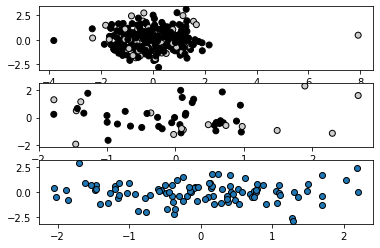

In [646]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

pca = PCA(n_components=2, whiten=True)
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
X_train_2d = pipe.fit_transform(X_train)

pca = PCA(n_components=2, whiten=True)
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
X_test_2d = pipe.fit_transform(X_test)

pca = PCA(n_components=2, whiten=True)
scaler = StandardScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
X_validation_2d = pipe.fit_transform(X_validation)

ax1.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax2.scatter(X_validation_2d[:, 0], X_validation_2d[:, 1], c=y_validation, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax3.scatter(X_test_2d[:, 0], X_test_2d[:, 1], edgecolor="k")


plt.show()